<a href="https://colab.research.google.com/github/captmmari/Decsriptive-analysis-Independent-project/blob/main/Nairobi_Hospital_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Defining the question.**

**Specifying the question.**


In this project, I am working with Nairobi Hospital. After conducting a clinical camp to test for hypothyroidism, the hospital has collected data on Thyroid patients and hopes to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#**Metrics for success.**

The metric of success for this project is the model accuracy. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit. In this project, my aim is to achieve an accuracy of at least 95%.

#**Experimental Design.**

1. Loading the libraries and dataset

2. Data cleaning and preparation

3. Performing the Univariate analysis

4. Performing the Bivariate analysis

5. Applying the Decision tree algorithms

6. Applying the Support Vector algorithms

7. Making predictions using the different models that I've created

8. Making conclusions and challenging the solution

#**Importing Libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.regression.quantile_regression as quant
import scipy as sp
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
/usr/

# **Loading Dataset**

In [2]:
# Loading dataset givem
fd = pd.read_csv('/content/hypothyroid.csv')
fd.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# **Cleaning the Dataset.**

In [3]:
# Checking dataset shape
fd.shape

(3163, 26)

This dataset has 3163 rows and 26 columns

In [4]:
# Checking dataset types
fd.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [5]:
# Checking dataset description
fd.describe().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Series([], dtype: float64)

In [6]:
# Checking dataset info
fd.info

<bound method DataFrame.info of            status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
0     hypothyroid  72   M            f  ...            y   10            n   ?
1     hypothyroid  15   F            t  ...            y   17            n   ?
2     hypothyroid  24   M            f  ...            y    0            n   ?
3     hypothyroid  24   F            f  ...            y    6            n   ?
4     hypothyroid  77   M            f  ...            y   44            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3158     negative  58   F            f  ...            y   95            n   ?
3159     negative  29   F            f  ...            y   98            n   ?
3160     negative  77   M            f  ...            y  104            n   ?
3161     negative  74   F            f  ...            y  137            n   ?
3162     negative  56   F            t  ...            y  143            n   ?

[3163 rows x 26 col

In [7]:
# Checking for null values
fd.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [8]:
#Checking for duplicated values
fd.duplicated().sum()

77

Dataset ha 77 duplicated values

In [9]:
# Removing the question marks in each column
fd.replace('?',np.nan,inplace=True)

# Convert Age, TSH, T3, TT4, T4U, FTI to numerical(Float)
fd[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]] = fd[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]].astype(float)

In [10]:
# Converting to categorical data
fd[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]] =fd[[
  "status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]].astype('category')

In [11]:
# remove the TBG columns since it contains almost entirely null values
fd.drop(['TBG','TBG_measured'], axis=1, inplace=True)

In [12]:
# calculate the mean age of the column age 
age_mean = fd['age'].mean()
print('mean of the age column is:  ',age_mean)

# adding the mean age to the empty cells
fd['age'].fillna(age_mean, inplace=True)


mean of the age column is:   51.154214206845786


In [13]:

# replacing the null values of the sex column with the mode sex
fd['sex'] = fd['sex'].fillna(fd['sex'].mode()[0])

# replacing the missing values with zero. This is because the patients who have missing values
# did not take the test. Therefore we will make the assumption that their test result was zero.
#df.fillna(0, inplace=True)

# confirming there are no missing values
fd.isnull().sum()

status                         0
age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
dtype: int64

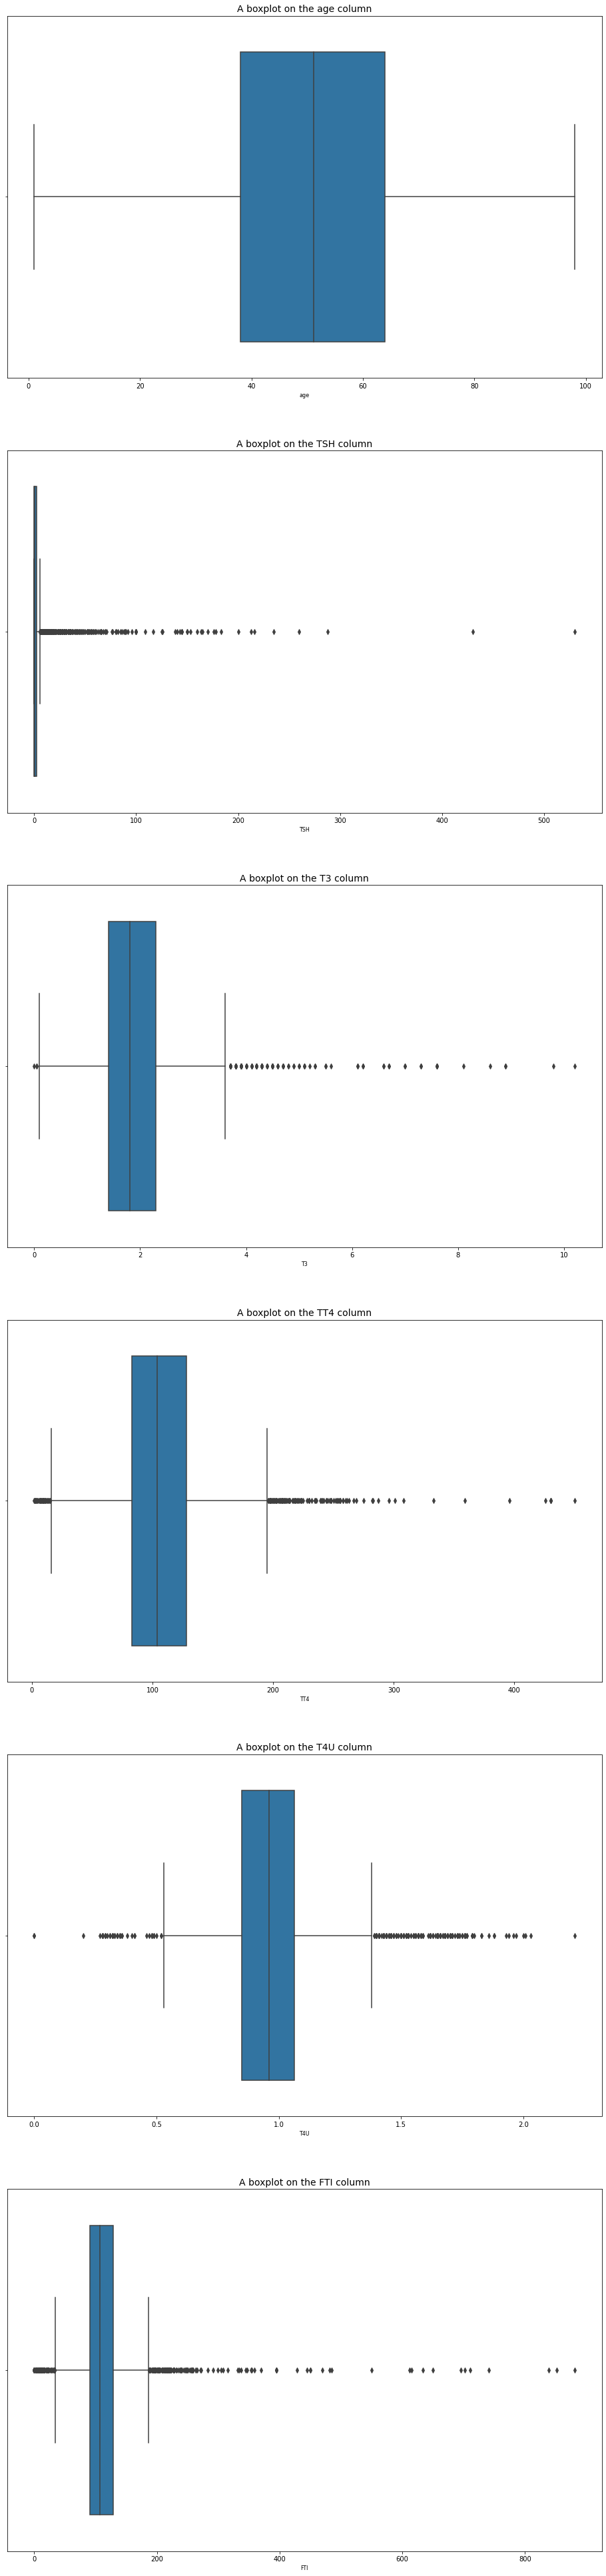

In [14]:
# Checking for Outliers


col_names = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
fig, ax = plt.subplots(len(col_names), figsize = (16,70))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = fd[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

There seems to be very many outliers, if we decide to drop them, the data may not give us accurate answers in our analysis.

In [15]:
#There seems to be very many outliers but lets count them to be sure

fd1 = fd[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]
Q1 = fd1.quantile(0.25)
Q3 = fd1.quantile(0.75)
IQR = Q3 - Q1
((fd1 < (Q1 - 1.5 * IQR)) | (fd1 > (Q3 + 1.5 * IQR))).sum()

age      0
TSH    388
T3     122
TT4    183
T4U    203
FTI    245
dtype: int64

In [16]:
# Identifying the duplicate Data

len(fd)-len(fd.drop_duplicates())

156

In [17]:
# Dealing with the Duplicate Data
# They are very few entries that are duplicates I will procceed to drop them as now.
fd = fd.drop_duplicates()

In [18]:

#Encoding columns
# encoding the true / false columns 

cat_cols = ['on_thyroxine','query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
       'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre']

In [19]:
# encoding the sex column
cat_enc = {'sex':{'M':0,'F':1}}

fd.replace(cat_enc, inplace=True)

fd['sex'].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0       0
1       1
2       0
3       1
4       0
       ..
3158    1
3159    1
3160    0
3161    1
3162    1
Name: sex, Length: 3007, dtype: int64

In [20]:
#Standardizing column names

fd.columns = fd.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


# **Exploratory Analysis.**

In [21]:
#getting summary
fd.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
count,3007,3007.000000,3007.000000,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007,2631.000000,3007,2406.000000,3007,2846.000000,3007,2847.000000,3007,2848.000000
unique,2,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,NaN,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN
freq,2866,NaN,NaN,2561,2952,2965,2904,2772,2780,2946,2910,2967,3005,2912,2631,NaN,2406,NaN,2846,NaN,2847,NaN,2848,NaN
mean,NaN,51.350030,0.704357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.809320,NaN,1.933666,NaN,108.706922,NaN,0.977559,NaN,115.489080
std,NaN,17.864731,0.456407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.023192,NaN,0.979488,NaN,44.606704,NaN,0.225796,NaN,60.147649
min,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000
25%,NaN,38.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.400000,NaN,83.000000,NaN,0.850000,NaN,91.000000
50%,NaN,51.154214,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,NaN,1.800000,NaN,104.000000,NaN,0.960000,NaN,107.000000
75%,NaN,64.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200000,NaN,2.300000,NaN,127.000000,NaN,1.060000,NaN,129.000000


In [22]:
# Mode
# Calculating mode across different columns

a = fd[['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti']].mode().head(1)

arr = a.to_numpy()
arr


array([['negative', 51.154214206845786, 1.0, 'f', 'f', 'f', 'f', 'f',
        'f', 'f', 'f', 'f', 'f', 'f', 'y', 0.0, 'y', 1.6, 'y', 98.0, 'y',
        0.98, 'y', 98.0]], dtype=object)

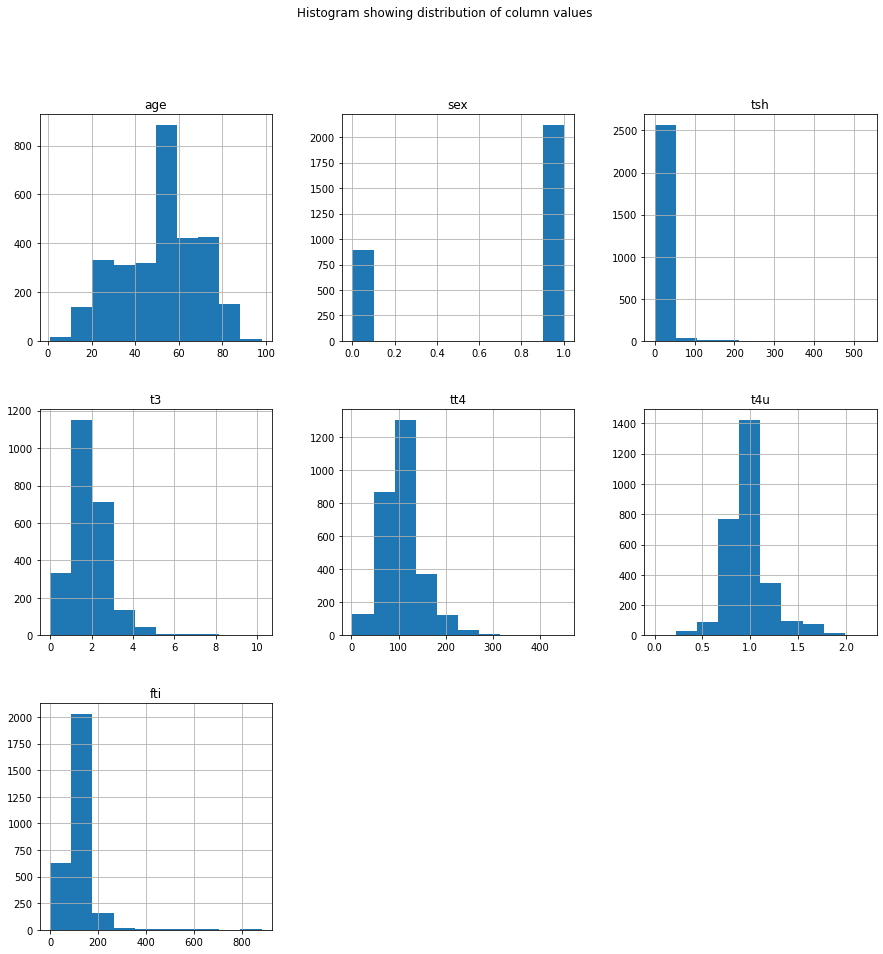

In [23]:

fd.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram showing distribution of column values")
plt.savefig('Histogram')
plt.show()

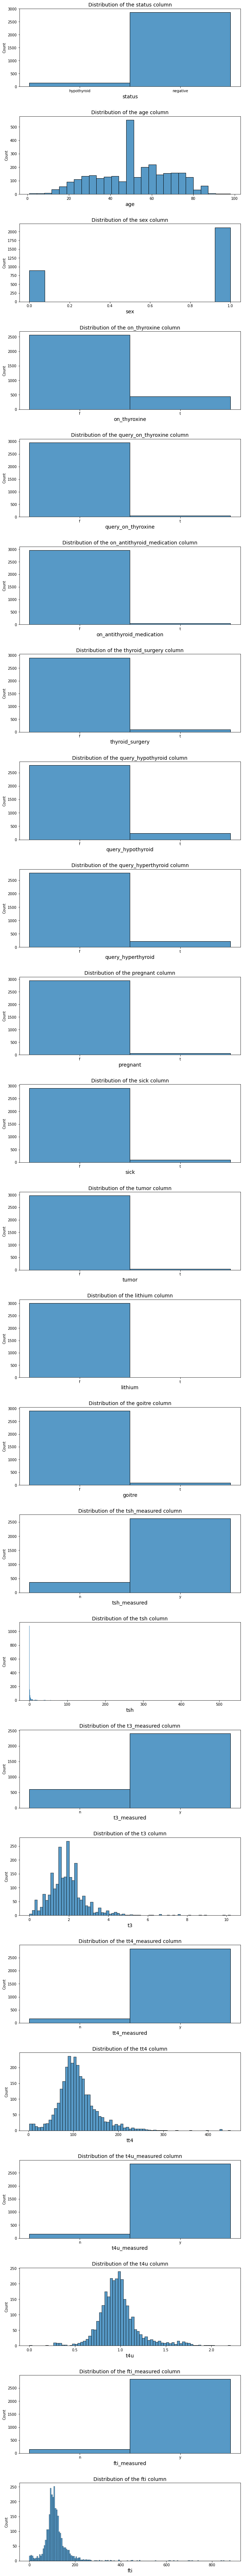

In [24]:
# teh distribution
col_names = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti']
fig, ax = plt.subplots(len(col_names), figsize = (10,100))
for i, col_val in enumerate(col_names):

    sns.histplot(x = fd[col_val], ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

In the  visualization above,, we observe that the worst combination on likelyhood of having hypothyroid diseas are;

1. Not being pregnant.

2. No presence of tumor.

3. Being a female.

4. Not being on medication(thyroxine medication and antithyroid medication).



#**Bivariate Analysis.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

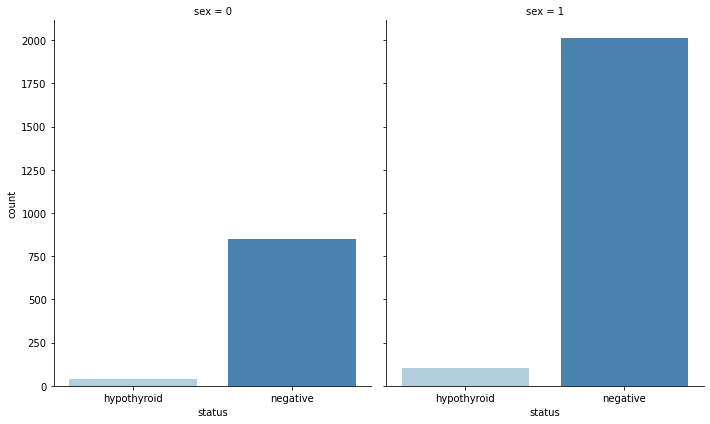

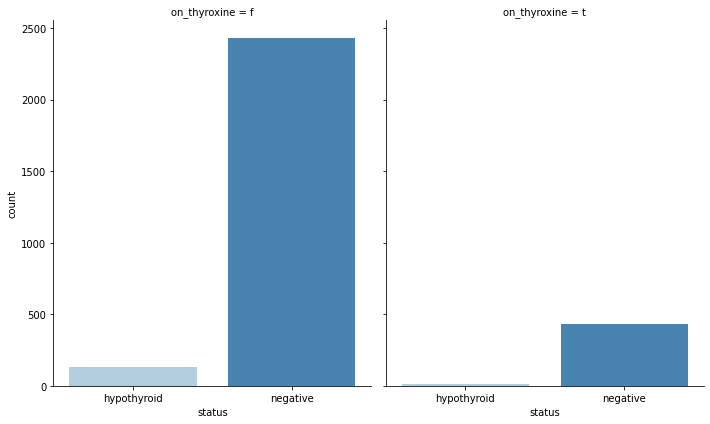

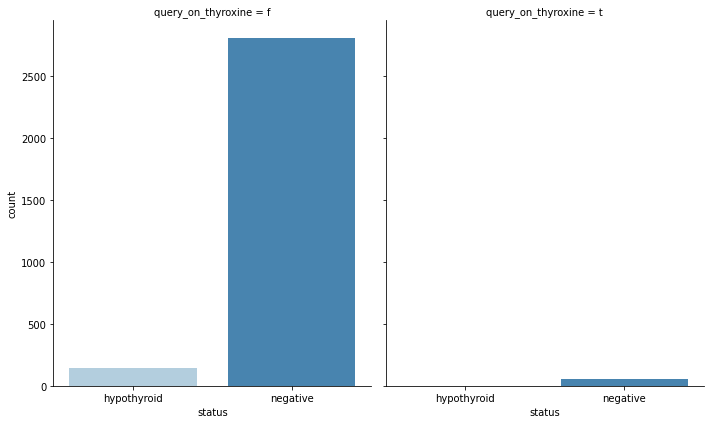

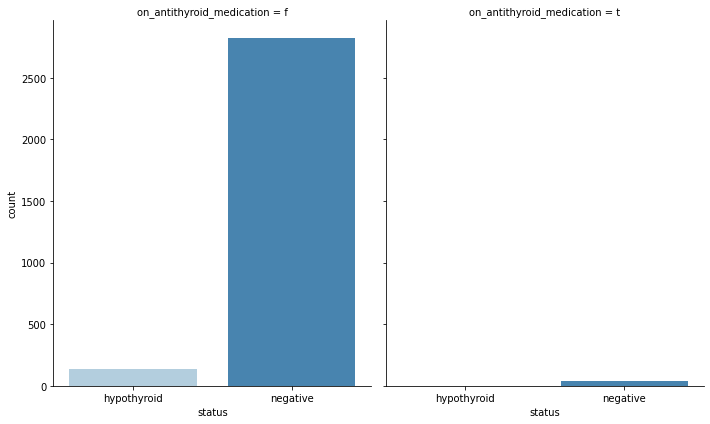

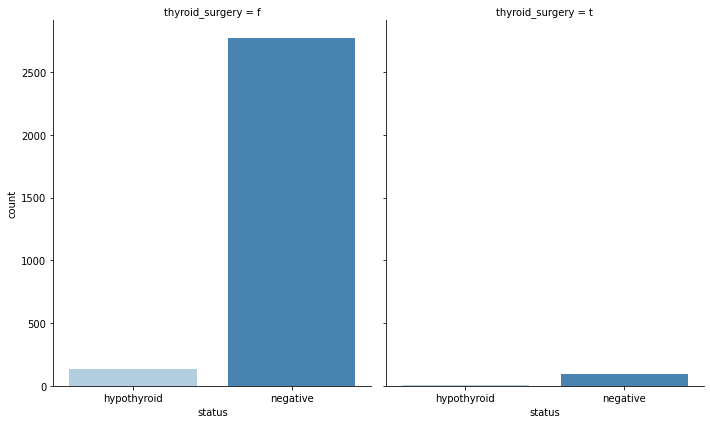

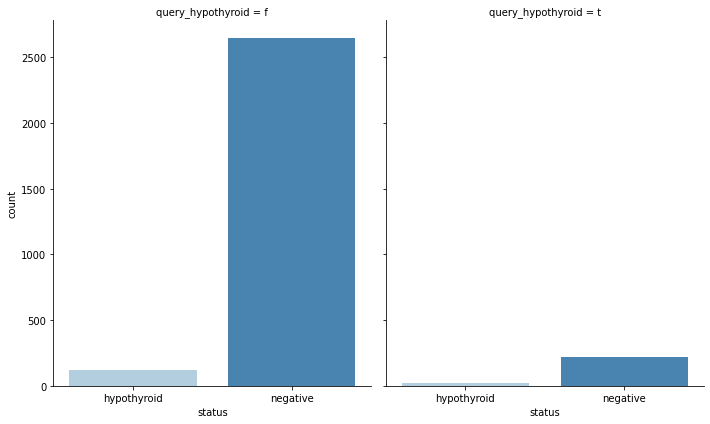

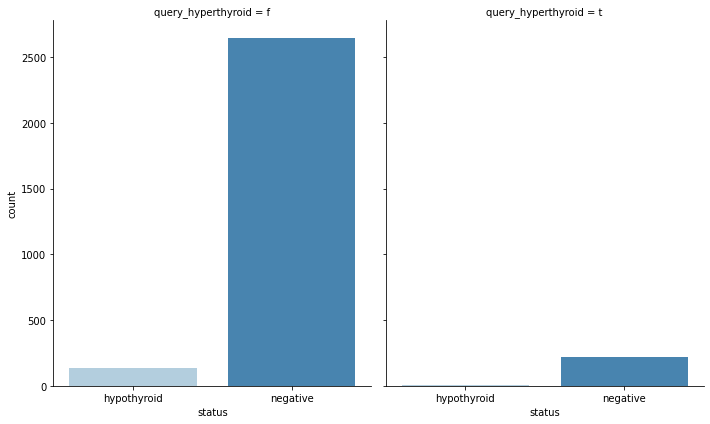

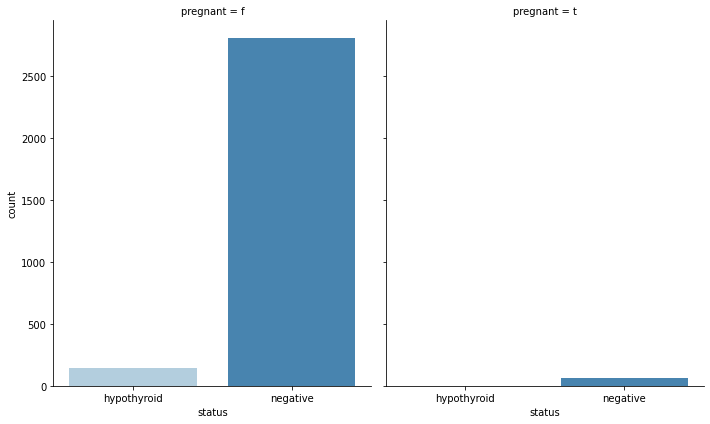

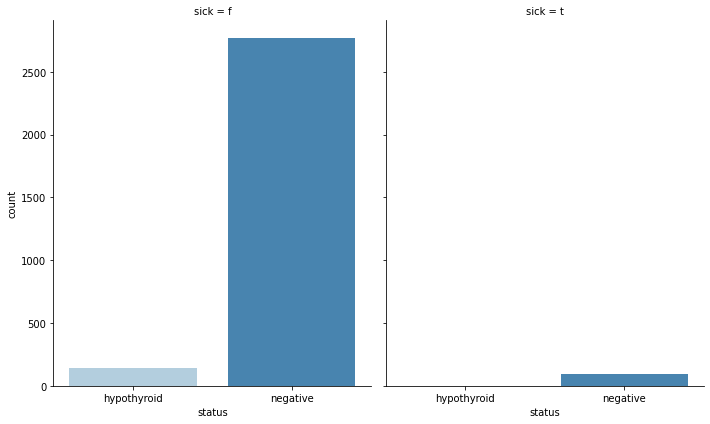

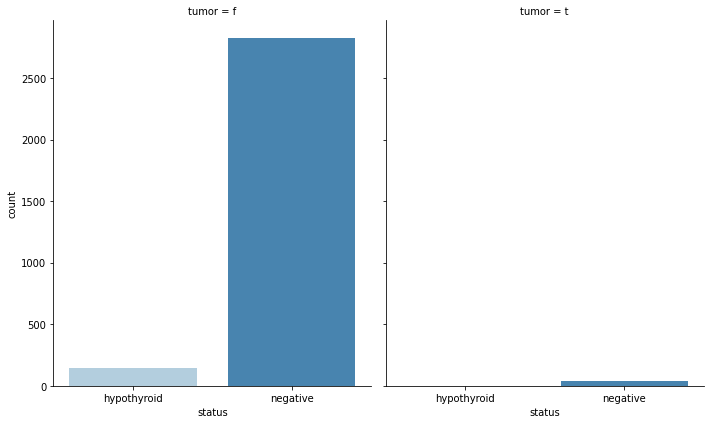

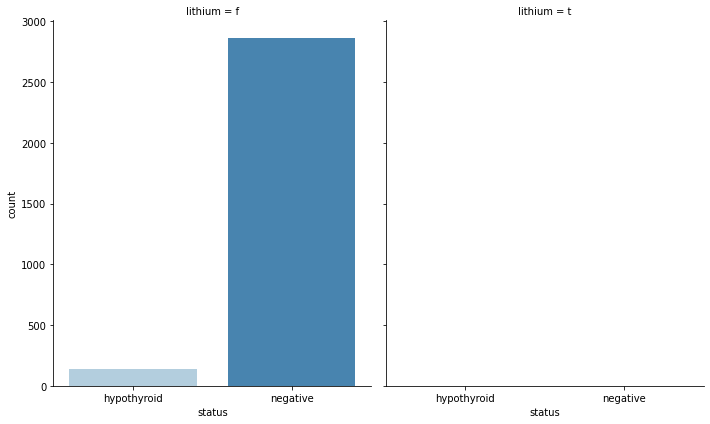

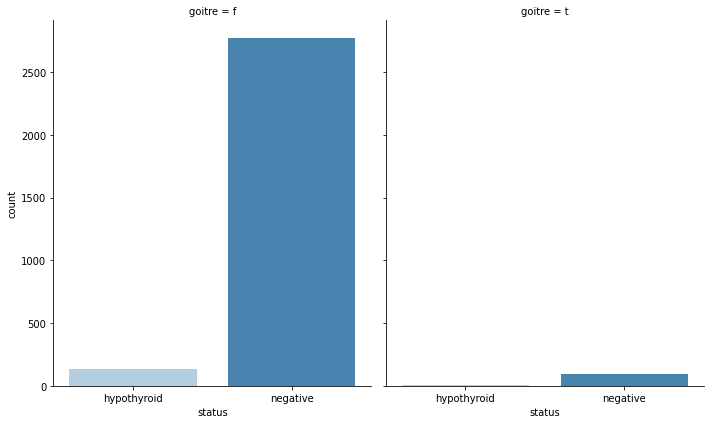

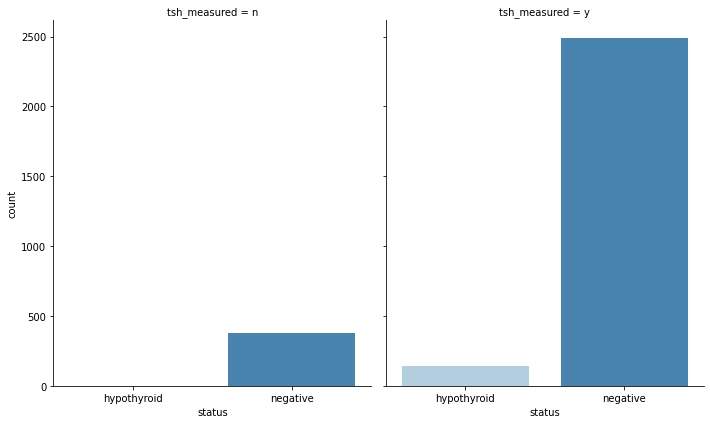

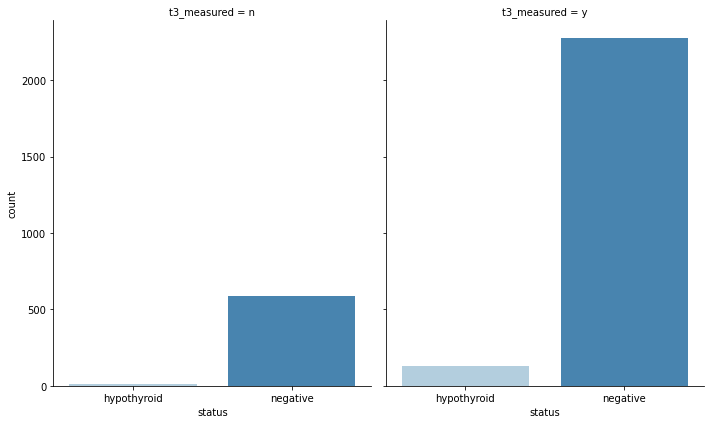

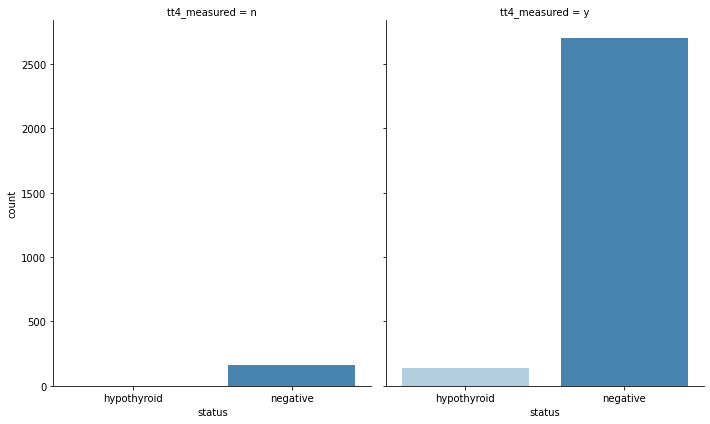

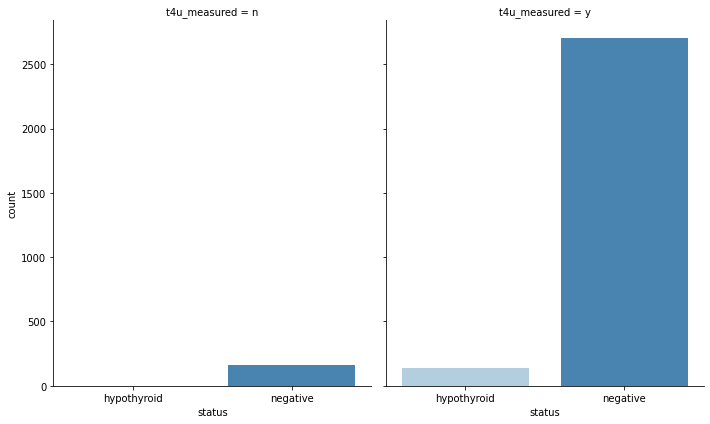

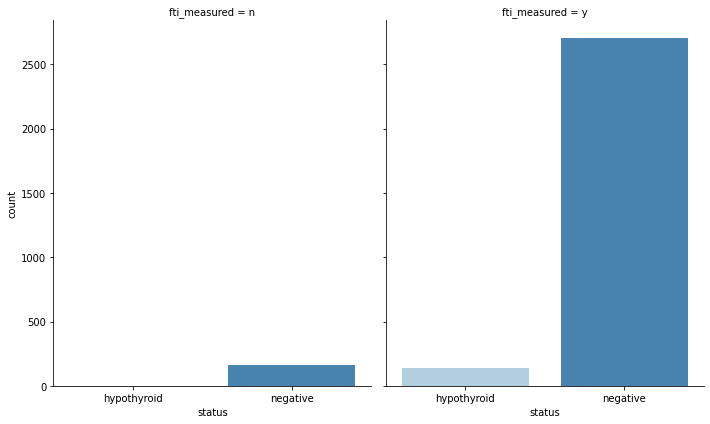

In [25]:
sns.catplot("status", col="sex", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="on_thyroxine", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="query_on_thyroxine", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="on_antithyroid_medication", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="thyroid_surgery", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="query_hypothyroid", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="query_hyperthyroid", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="pregnant", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="sick", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="tumor", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="lithium", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="goitre", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="tsh_measured", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="t3_measured", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="tt4_measured", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="t4u_measured", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="fti_measured", col_wrap=4, data=fd, kind="count", height=6, aspect=.8, palette='Blues')

plt.show()

In [26]:
fd.nunique()

status                         2
age                           93
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
tsh_measured                   2
tsh                          239
t3_measured                    2
t3                            69
tt4_measured                   2
tt4                          268
t4u_measured                   2
t4u                          158
fti_measured                   2
fti                          280
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


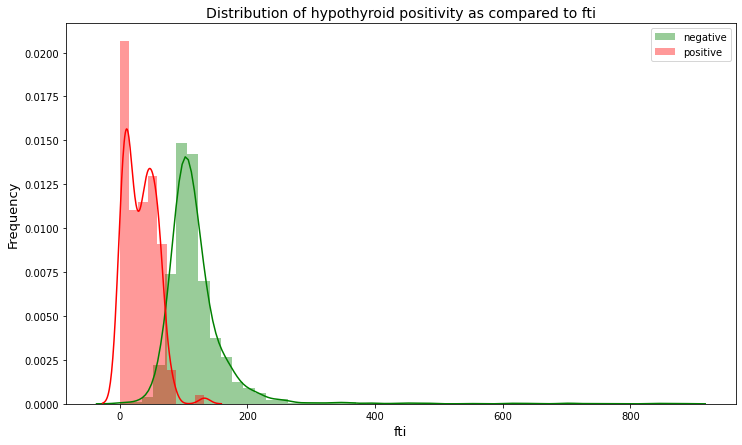

In [27]:

# Plotting histogram to show distribution of hypothyroid positivity as compared to fti
# 
negative = fd.loc[fd.status=='negative', 'fti']    # Selecting only negative datapoints in the age column
positive = fd.loc[fd.status=='hypothyroid', 'fti']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(negative, color="green", label="negative")
sns.distplot(positive, color="red", label="positive")
plt.title('Distribution of hypothyroid positivity as compared to fti', fontsize = 14, color = 'k')
plt.xlabel('fti', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

From this illustration, We can observes that lower the rate of fti, the more likely you will test positive for hypothyroid

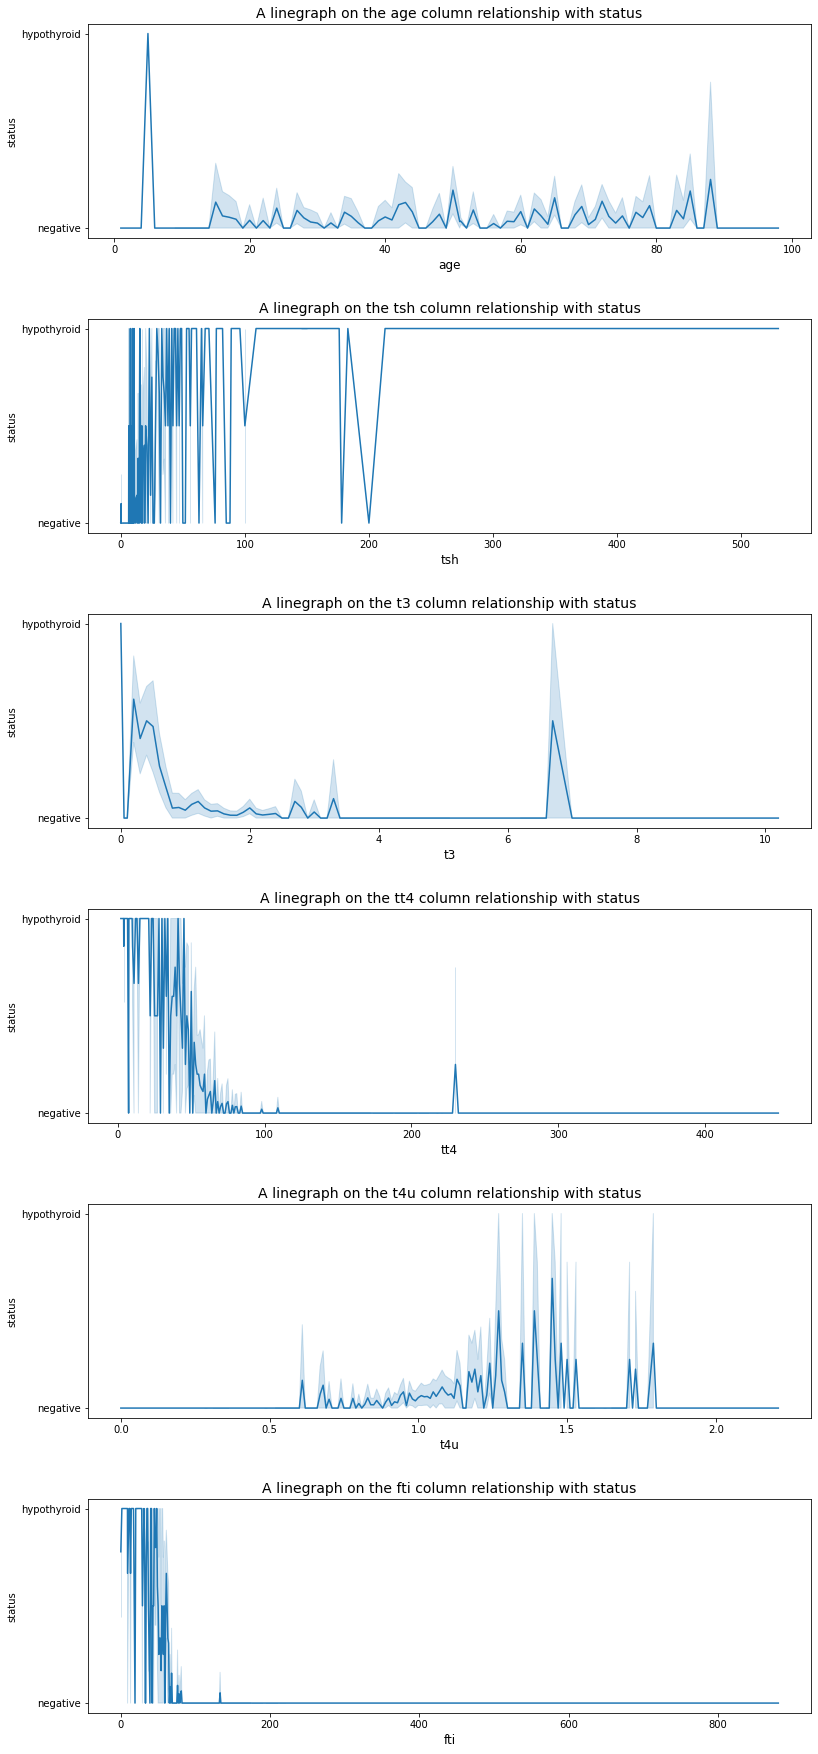

In [28]:

col_names = ["age", "tsh", "t3", "tt4", "t4u", "fti"]

fig, ax = plt.subplots(len(col_names), figsize = (12,25))
for i, col_val in enumerate(col_names):

    sns.lineplot(x = fd[col_val], y=fd['status'], ax=ax[i])
    ax[i].set_title('A linegraph on the {} column relationship with status'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

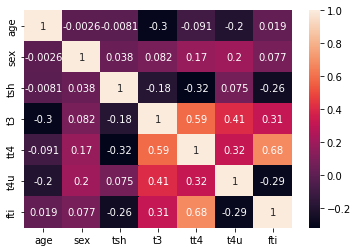

In [29]:
# heatmap
sns.heatmap(fd.corr(),annot=True)
plt.show()

#**Decision Trees.**

In [30]:
bf = fd.dropna()

In [33]:
from pandas.core.arrays import numeric
# 
numeric_col = bf[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]

categorical_col = bf[['fti_measured', 't4u_measured', 'on_antithyroid_medication', 'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'tsh_measured']]

boolean_col = bf[['on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'on_thyroxine', 'query_on_thyroxine']]


# Boolean columns

for column in boolean_col:
  bf[column] = bf[column].replace('f', False)
  bf[column] = bf[column].replace('t', True)

for column in bf.columns:
  if column in numeric_col:
    bf[column] = bf[column].astype('float')
  elif column in categorical_col:
    bf[column] = bf[column].astype('object')
  elif column in boolean_col:
    bf[column] = bf[column].astype('bool')
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [49]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9786324786324786


/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [36]:

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


In [37]:
# split the data into labels and features

X = bf[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(bf['status']=='hypothyroid',0,1)

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# setting the dicision tree classifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.014957264957264958
Mean Squared Error: 0.014957264957264958
Root Mean Squared Error: 0.12229989761755714
The accuracy of the model is  0.9850427350427351


/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [38]:


# setting the dicision tree classifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


,Actual,Predicted
count,468.000000,468.000000
mean,0.946581,0.942308
std,0.225108,0.233410
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


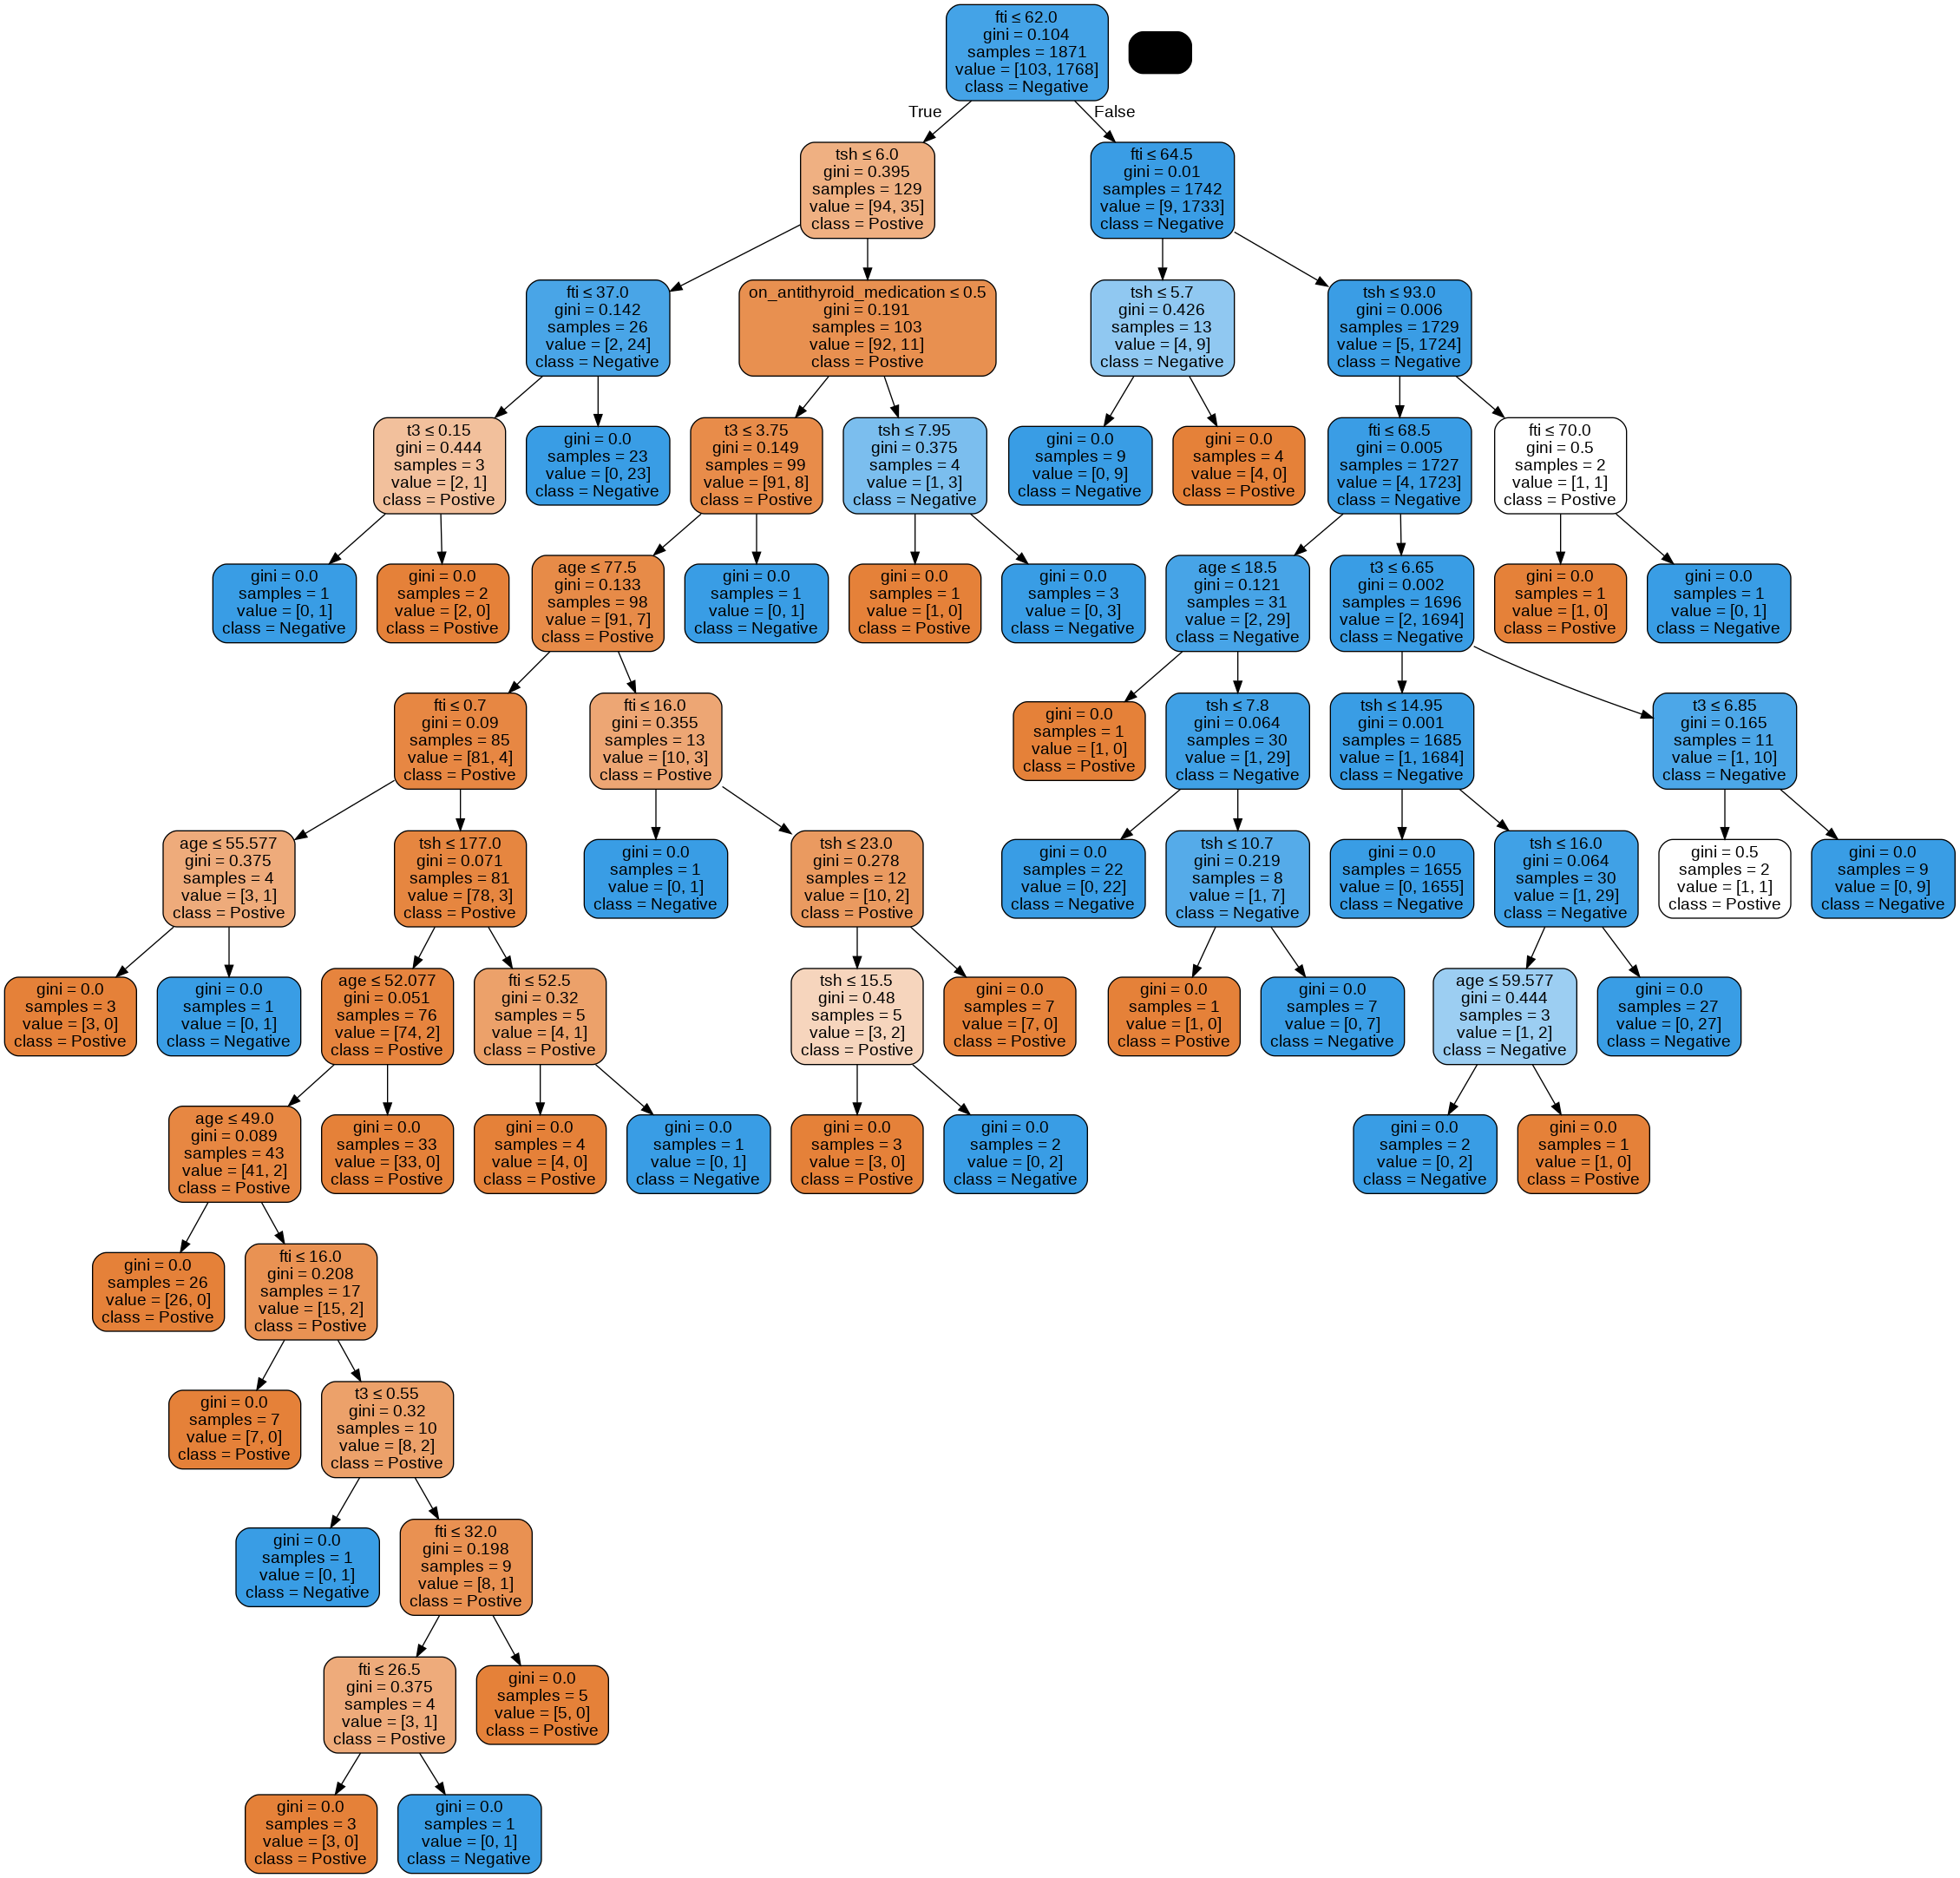

In [51]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Postive', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

**Random Forests.**

In [52]:
# split the data into labels and features

X = bf[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(bf['status']=='hypothyroid',0,1)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Creating a dictionary of parameters to tune
#
parameters = {'n_estimators': np.arange(16),
         'max_depth': np.arange(10)}

# Setting the number of folds to 5 and instantiating the model
# 

grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, return_train_score = True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

#Lets see how the different max depth values compare to each other
print('how do the different depths compare to each other''\n')
for i in range(len(parameters['max_depth'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])


print('\n')
from sklearn.ensemble import RandomForestRegressor
dtree_model = RandomForestRegressor(n_estimators = grid_search.best_params_['n_estimators'], max_depth = grid_search.best_params_['max_depth']).fit(X_train, y_train)
dtree_model
print('Training score:', dtree_model.score(X_train, y_train))
print('Test score:', r2_score(y_test, y_pred))
y_pred = dtree_model.predict(X_test)
#Random Forests model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cu

ValueError: ignored

In [40]:
# split the data into labels and features

X = bf[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(bf['status']=='hypothyroid',0,1)


# splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

forest = RandomForestClassifier(n_estimators=100, min_samples_split=20, max_depth=5, random_state=0)

forest=forest.fit(X_train, y_train)

# predicting using the model
y_pred = forest.predict(X_test)

# comparing the actual and predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the random forest model is ',metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use,

Mean Absolute Error: 0.017094017094017096
Mean Squared Error: 0.017094017094017096
Root Mean Squared Error: 0.1307440900921227
The accuracy of the random forest model is  0.9829059829059829


/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

In [41]:
pip install --upgrade scikit-learn==0.20.3

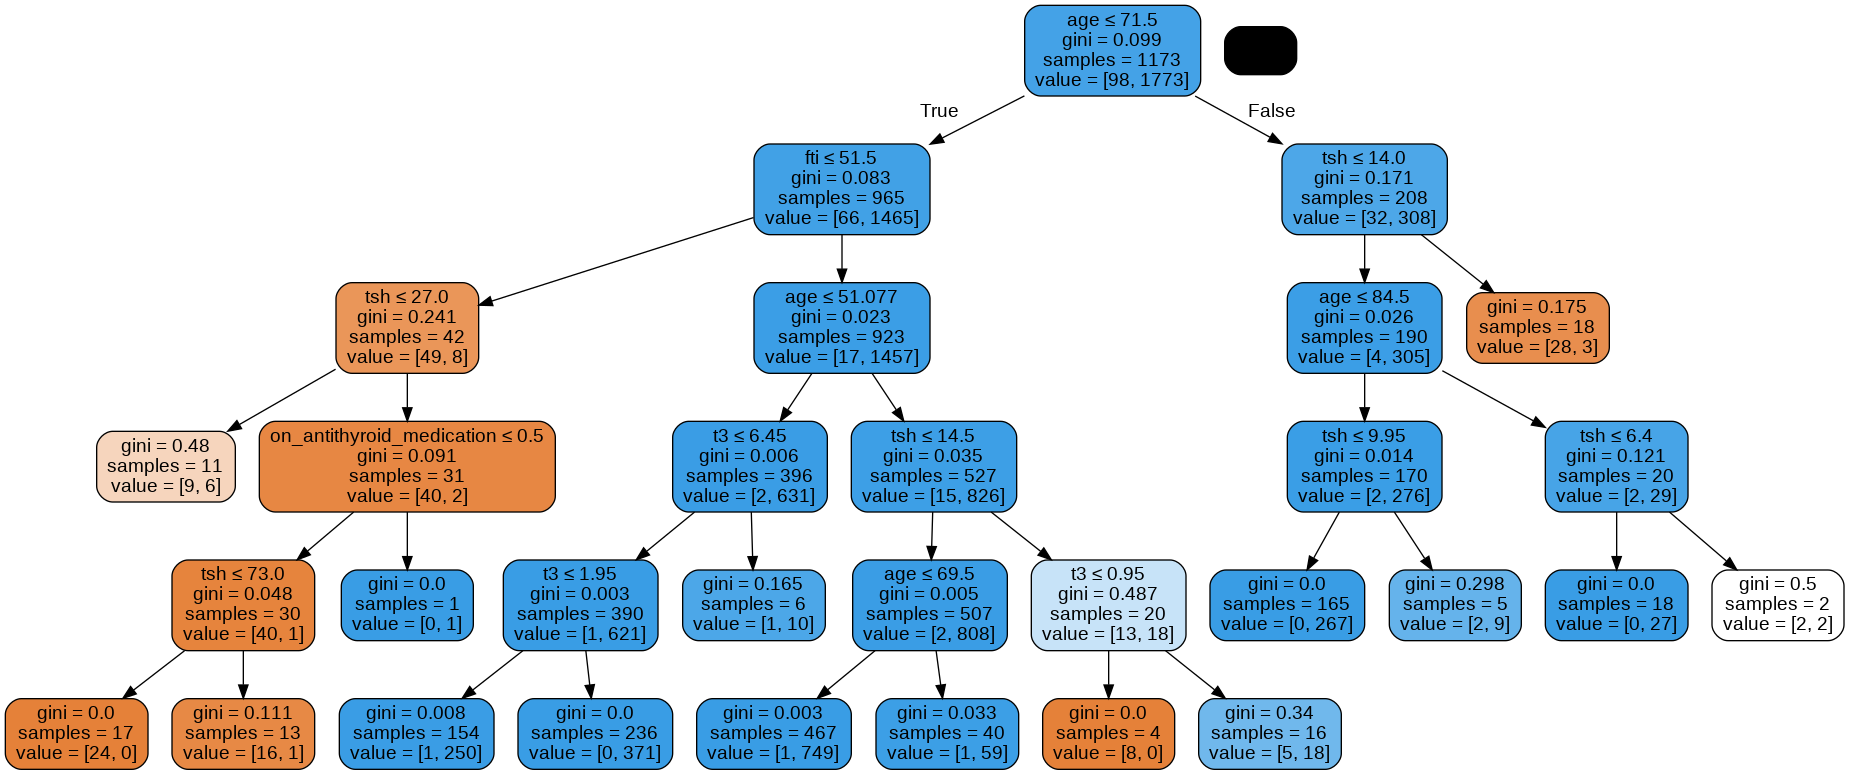

In [53]:
feature_names = X.columns
test_features = feature_names

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [43]:
# get numerical feature importances 
importances = list(forest.estimators_[10].feature_importances_)

# list of tuples with variable and importance

feature_importances = [(feature, round(importance,2)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()

# sort the values in ascending order

feature_importances = sorted(feature_importances, key=(lambda x: x[1]))

[print('variable: {:20}  importance: {}'.format(*pair)) for pair in feature_importances]

[('tsh', 0.15), ('fti', 0.8), ('on_antithyroid_medication', 0.0), ('on_antithyroid_medication', 0.0), ('t3', 0.01), ('age', 0.04)]

variable: on_antithyroid_medication  importance: 0.0
variable: on_antithyroid_medication  importance: 0.0
variable: t3                    importance: 0.01
variable: age                   importance: 0.04
variable: tsh                   importance: 0.15
variable: fti                   importance: 0.8


[None, None, None, None, None, None]

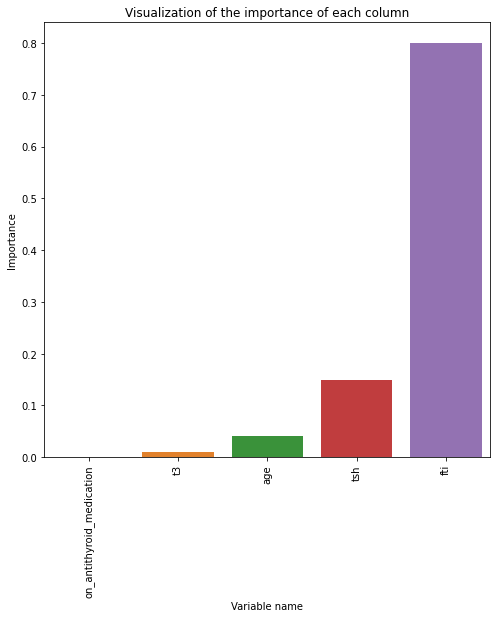

In [44]:
#Visualizing the important features

#Creating the dataframe with the important features
x_val = pd.DataFrame(feature_importances)
x_val
#Plotting the graphs using the seaborn barplot
plt.figure(figsize=(8,8))
sns.barplot(x =0, y = 1, data=x_val)
plt.xlabel('Variable name')
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Visualization of the importance of each column')
plt.show()

#**Support Vector machines.**

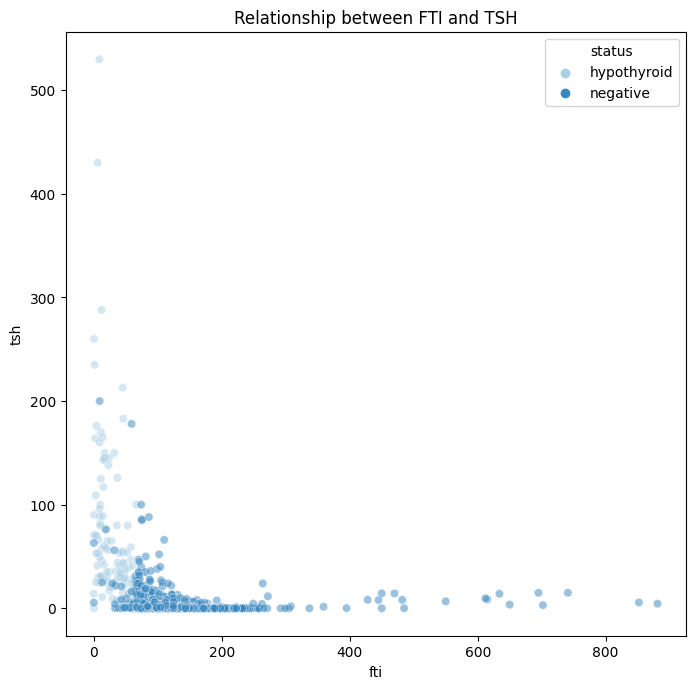

In [45]:
#Visualizing the relation of important features in the data
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x='fti', y='tsh', hue='status', alpha=0.5, data=bf, palette='Blues')
plt.title('Relationship between FTI and TSH');

In [47]:
#Fitting the model using a linear function
# split the data into x and y
X = bf[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(bf['status']=='hypothyroid',0,1)


# standardizing the data
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

X = preprocessing.normalize(X)

# splitting the data into training data and testing data. We will train using 80% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# fitting the model into the data

model = SVC(kernel='linear')
  
lin_model = model.fit(X_train,y_train)

# making prediction
y_pred = model.predict(X_test)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.019230769230769232
Mean Squared Error: 0.019230769230769232
Root Mean Squared Error: 0.1386750490563073
The accuracy of the linear model is  0.9807692307692307


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


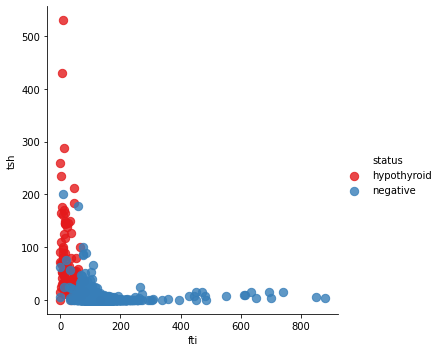

In [56]:
# Plotting two ingredients
sns.lmplot('fti', 'tsh', data=bf, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

**Polynomial Linear.**

In [48]:
# fitting the model on to the data
X = bf[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(bf['status']=='hypothyroid',0,1)

# standardizing the data

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

#X_svm = preprocessing.normalize(x)

# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model 

poly = SVC(kernel='poly',degree=3, gamma='scale')

# Training the model using the training set

poly.fit(X_train, y_train)
#making prediction
y_pred = poly.predict(X_test)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))


Mean Absolute Error: 0.019230769230769232
Mean Squared Error: 0.019230769230769232
Root Mean Squared Error: 0.1386750490563073
The accuracy of the linear model is  0.9807692307692307


In [62]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto_derecated')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

TypeError: ignored

In [63]:
# fitting the model on to the data
X = bf[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(bf['status']=='hypothyroid',0,1)

# standardizing the data

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

#X_svm = preprocessing.normalize(x)

# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model 

poly = SVC(kernel='poly',degree=3, gamma='scale')

# Training the model using the training set

poly.fit(X_train, y_train)
#making prediction
y_pred = poly.predict(X_test)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))


Mean Absolute Error: 0.019230769230769232
Mean Squared Error: 0.019230769230769232
Root Mean Squared Error: 0.1386750490563073
The accuracy of the linear model is  0.9807692307692307


#**Conclusion.**

In [66]:
# Lets compare the performance of our different models

# initialize list of lists
data = [['Random Forest with grid search', 0.019735460334817087, 0.010839192176258087, 0.10411144114004996, 'Nan'], ['Random Forest', 0.017094017094017096, 0.017094017094017096, 0.1307440900921227, '98.2%'],['Support Vector Machine Algorithm', 0.019230769230769232, 0.019230769230769232, 0.1386750490563073, '98.1%'],['With Polynomial function', 0.019230769230769232, 0.019230769230769232, 0.1386750490563073, '98.1%']]
 
# Create the pandas DataFrame

df = pd.DataFrame(data, columns = ['Model_Name','Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error','Accuracy'])
 
# print dataframe.
print(df )

                         Model_Name  ...  Accuracy
0    Random Forest with grid search  ...       Nan
1                     Random Forest  ...     98.2%
2  Support Vector Machine Algorithm  ...     98.1%
3          With Polynomial function  ...     98.1%

[4 rows x 5 columns]


In [68]:
model_compare = pd.DataFrame(df )  #pd. DataFrame(np_array, columns=['Column1', 'Column2']) 
model_compare.set_index('Model_Name')

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
Model_Name,,,,
Random Forest with grid search,0.019735,0.010839,0.104111,Nan
Random Forest,0.017094,0.017094,0.130744,98.2%
Support Vector Machine Algorithm,0.019231,0.019231,0.138675,98.1%
With Polynomial function,0.019231,0.019231,0.138675,98.1%


As per the table above, the best performing model was the Random forest. scoring an accuracy of 98.2%

I was not able to get the accuracy score of the Random Forest with grid search because the prediction was not binary. however I believe it would have given the best score.

The least performing model were two, the sSVM algorithm andpolynomial function with an accuracy score of 98.1%

All models passed my metric of success of an accuracy level of above 95%